In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 📌Смотрим  загрузку


In [3]:
df = pd.read_csv("churn.csv")
df.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 📌📌Очистка  и  анализ


In [4]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 10127 rows , 20 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

По информации о базе данных можно увидеть, что в ней нет NULL-элементов, все элементы имеют значения.

А также сравнивая вывод первых строк базы с информацией о ней можно подметить, что object присутствует только в столбцах с строковыми значениями, в данном случае с объектами.

Соответственно все типы данных верны и нет исключений.

<h3>Проверяем  на  повторы


In [6]:
num_duplicates = df.duplicated().sum()

print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 0


Повторы не обнаружены.

<h3>Графическое изображение отсутствия NULL

<Axes: >

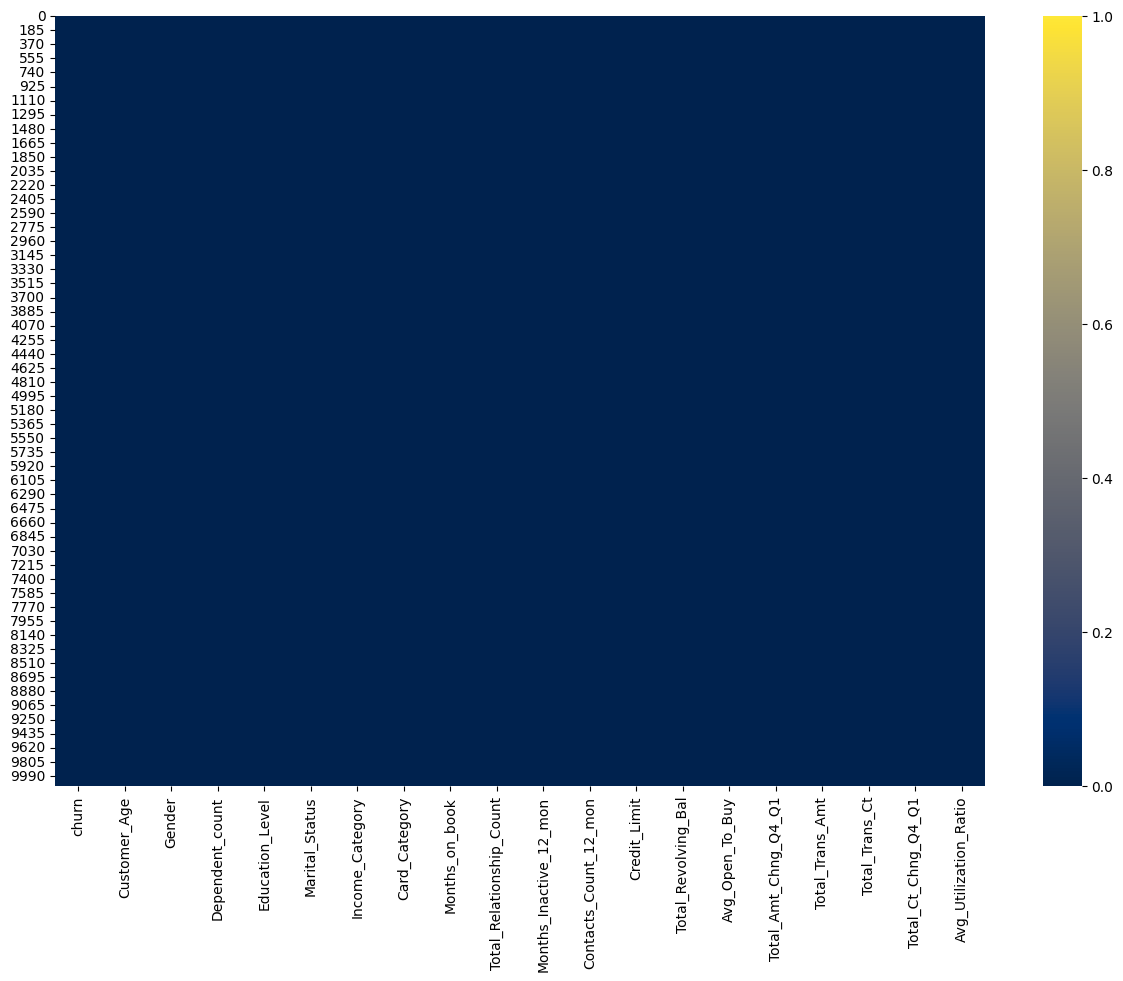

In [7]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(), cmap='cividis', vmin=0, vmax=1)

In [8]:
df.isnull().sum()

churn                       0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Создаю новую базу только с числовыми значениями.

In [9]:
df_setect_out=df[df.columns[df.dtypes != 'object']]
df_setect_out

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Проверяю по формуле, в каких столбцах могут находится находятся выбросы.

In [10]:
outlier_cols = []

for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


Графически показываю выбросы.

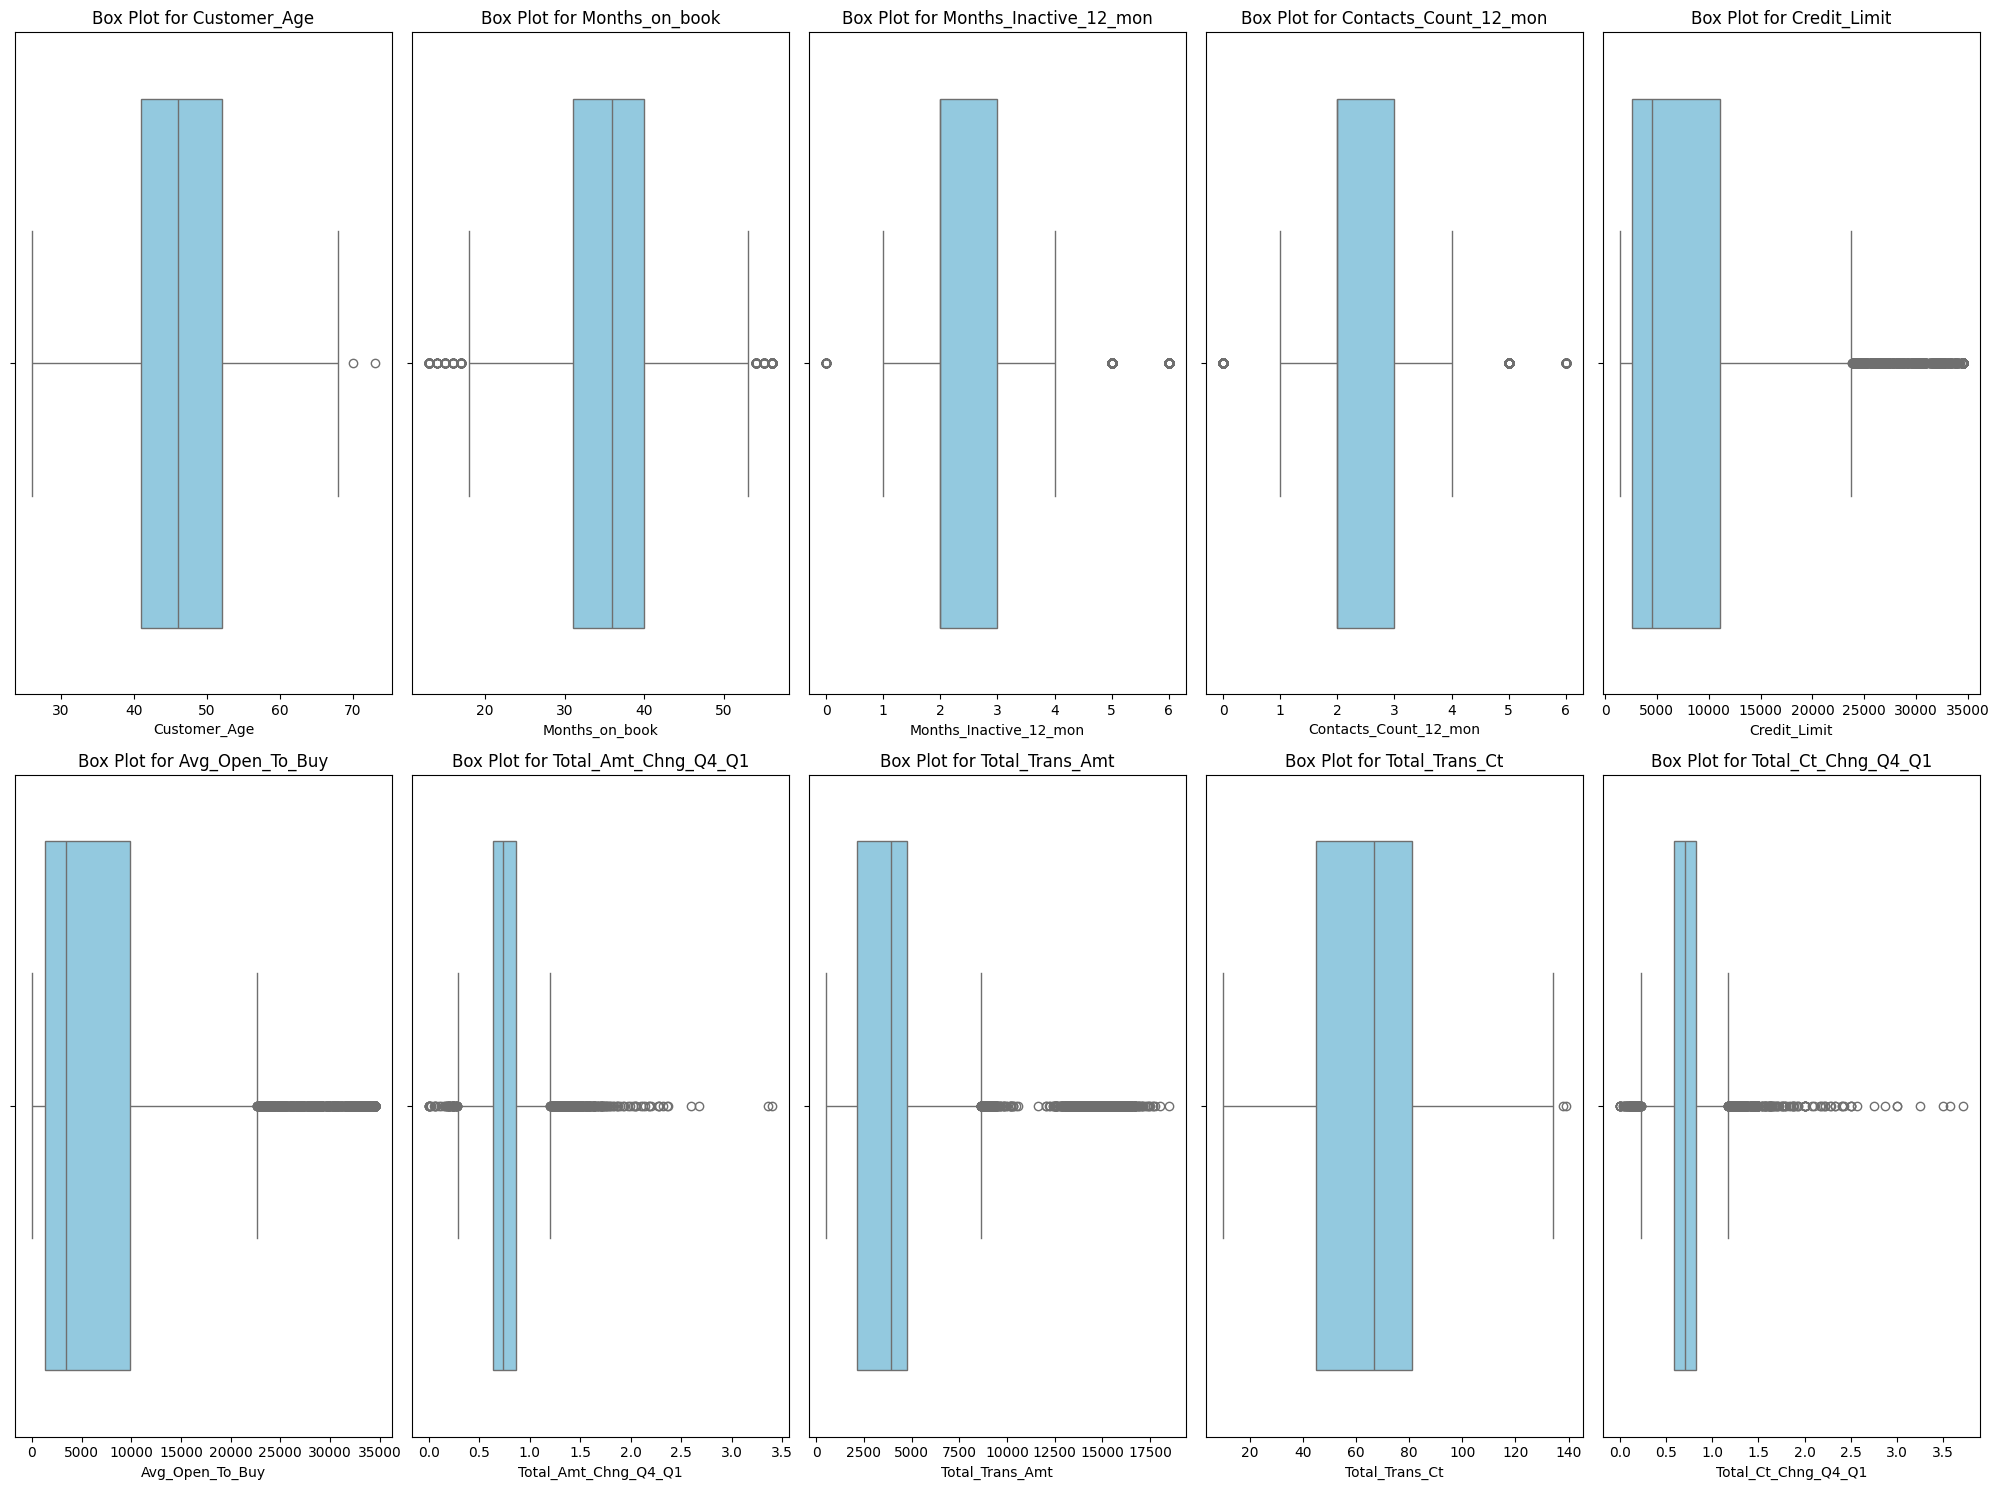

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 15))

# Create box plots for each column
for i, column in enumerate(df[outlier_cols].columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i // 5][i - (i // 5) * 5], color='skyblue')
    axes[i // 5][i - (i // 5) * 5].set_title(f'Box Plot for {column}')


plt.tight_layout()
plt.show()

Впринципе везде значения вроде имеют место быть: как выбросы, так и нормализованные. Хотя выбросов для такой базы данных и таких значений слишком много в некоторых боксплотах.

Медианы, в целом, находятся между нижним и верхним квартилем ближе к середине.

Непонятно только, куда съехала медиана в неактивных месяцах и месяцах посещения.

Предположительно, смотря на график, медиана съехала влево на нижний квартиль.

In [12]:
# def replace_outliers(column, replace_value):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

# for col in ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']:
#     replace_outliers(df[col], replace_value=df[col].median())


Вроде выбросы найдены, но узнаем наверняка

In [13]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Медиана тех столбцов (50%) и вправду равна первому кварталю (25%).

Соответсвенно боксплоты вывели всё правильно.

Все значения удовлетворяют логическим выводам, которые можно по ним сделать.

А именно максимальные и минимальные значения имеют место быть во всех столбцах. И стандартное отклонение не превышает норму для этих параметров.
# Выбросов нет.

# 📌📌Визуализация 📊📈

# 📌Отток клиентов к среднему кол-ву транзакций за последние 12 месяцев


In [14]:
average_TTA = df.groupby('churn')['Total_Trans_Ct'].mean().reset_index()
TTA_mapping = {'Attrited Customer': 'Ушедшие клиенты', 'Existing Customer': 'Текущие клиенты'}
average_TTA.churn = average_TTA.churn.map(TTA_mapping)
average_TTA

,churn,Total_Trans_Ct
0,Ушедшие клиенты,44.933620
1,Текущие клиенты,68.672588


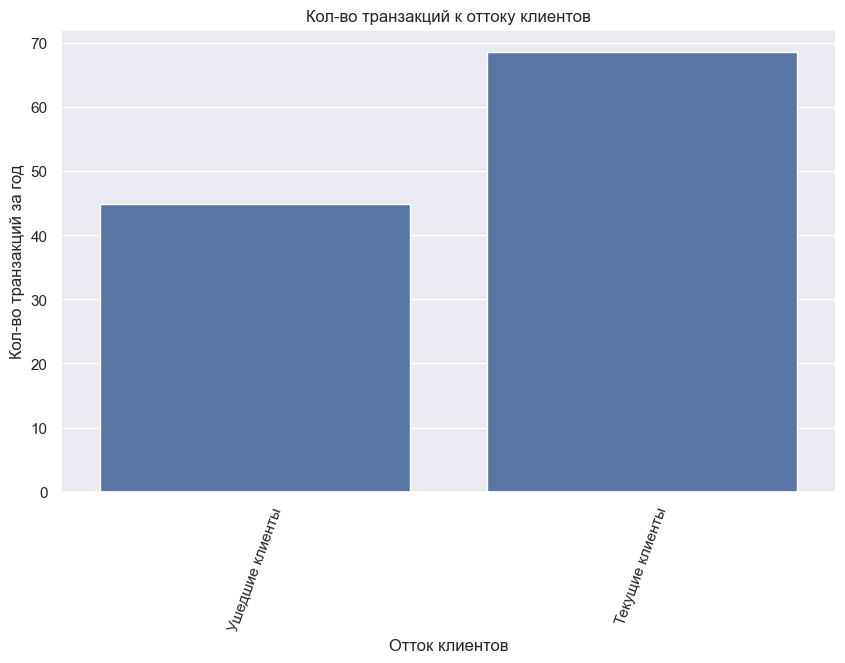

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='churn', y='Total_Trans_Ct', data=average_TTA)
plt.title('Кол-во транзакций к оттоку клиентов')
plt.xlabel('Отток клиентов')
plt.ylabel('Кол-во транзакций за год')
plt.xticks(rotation=70)

plt.show()

Можно увидеть, что люди, которые остались совершали где-то в 1.5 раза больше транзакций.

# 📌Зависимость оттока клиентов от изменения кол-ва транзакций с первого квартала по четвёртый.

Составляю таблицу зависимости оттока от изменения транзакций.

In [16]:
average_TQ = df.groupby('churn')['Total_Ct_Chng_Q4_Q1'].mean().reset_index()
TQ_mapping = {'Attrited Customer': 'Ушедшие клиенты', 'Existing Customer': 'Текущие клиенты'}
average_TQ.churn = average_TQ.churn.map(TQ_mapping)
average_TQ

,churn,Total_Ct_Chng_Q4_Q1
0,Ушедшие клиенты,0.554386
1,Текущие клиенты,0.742434


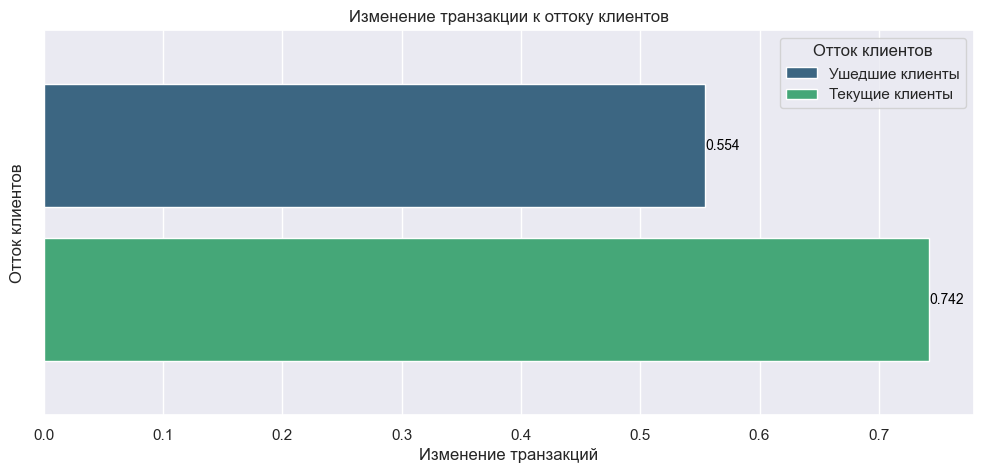

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Total_Ct_Chng_Q4_Q1', hue='churn', data=average_TQ, palette='viridis', gap=0.2)

plt.xlabel('Изменение транзакций')
plt.ylabel('Отток клиентов')
plt.title('Изменение транзакции к оттоку клиентов')

plt.legend(title="Отток клиентов")

for p in ax.patches:
    if p.xy[1]==0:
        break
    ax.annotate(f'{float(p.get_width()):.3f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.show()

Видно, что чем больше люди начинают выполнять транзакции, тем меньше шанс, что они покинут банк.

# 📌Зависимость оттока клиентов от коэффициента использования карт

In [18]:
average_AUR = df.groupby('churn')['Avg_Utilization_Ratio'].mean().reset_index()
AUR_mapping = {'Attrited Customer': 'Ушедшие клиенты', 'Existing Customer': 'Текущие клиенты'}
average_AUR.churn = average_AUR.churn.map(AUR_mapping)
average_AUR

,churn,Avg_Utilization_Ratio
0,Ушедшие клиенты,0.162475
1,Текущие клиенты,0.296412


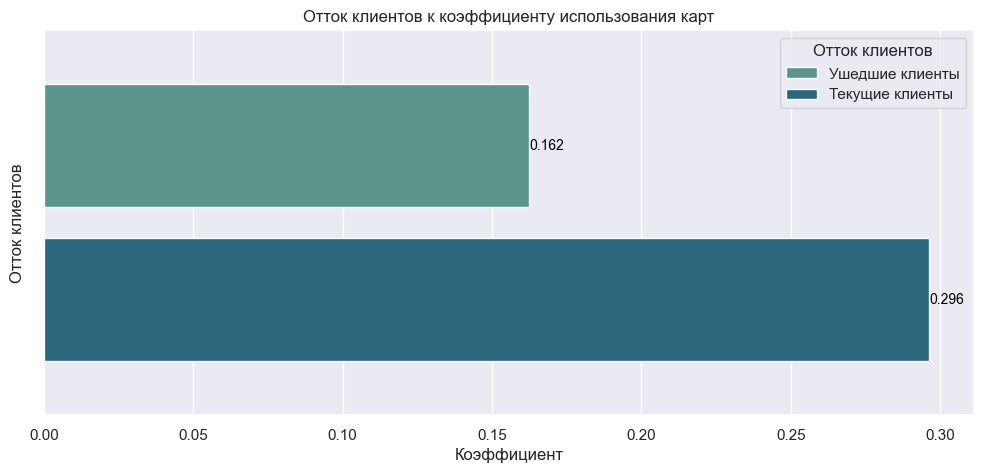

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Avg_Utilization_Ratio', hue='churn', data=average_AUR, palette='crest', gap=0.2)

plt.xlabel('Коэффициент')
plt.ylabel('Отток клиентов')
plt.title('Отток клиентов к коэффициенту использования карт')

plt.legend(title='Отток клиентов')

for p in ax.patches:
  if p.xy[1]==0:
    break
  ax.annotate(f'{float(p.get_width()):.3f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.show()

Почти в два раза клиенты, которые остались, больше используют карты банка.

# 📌Отток клиентов в зависимости от их бездействия в банке.

In [20]:
exist_counts=df['Months_Inactive_12_mon'][df['churn'] == 'Existing Customer'].mean()
attr_counts=df['Months_Inactive_12_mon'][df['churn'] == 'Attrited Customer'].mean()

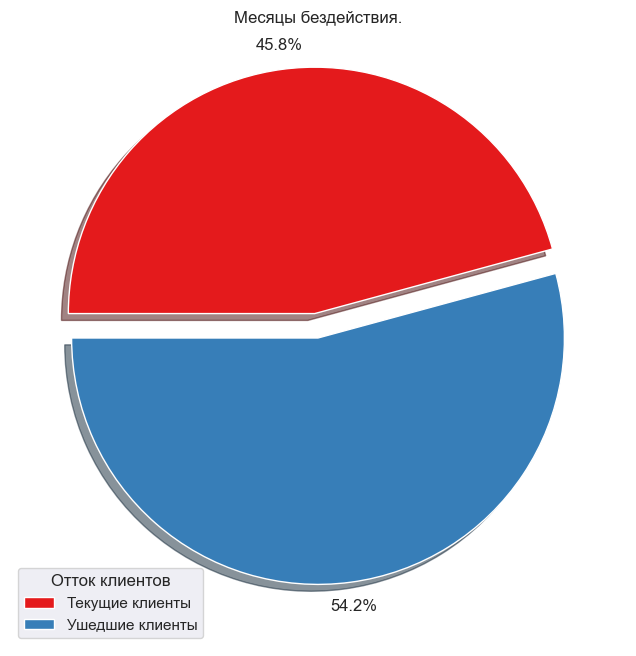

In [21]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0)
plt.pie([exist_counts, attr_counts], labels=['Текущие клиенты', 'Ушедшие клиенты'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=None, startangle=180, colors=plt.cm.Set1.colors, explode=explode, shadow=True, counterclock=False)

plt.legend(title="Отток клиентов")
plt.title('Месяцы бездействия.')

plt.show()



Можно заметить, что тех, кто бездействовал, в процентном соотношении больше среди ушедших.

# 📌Распределение карт и заработка

# Заработок

In [22]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [23]:
Inc = df[['churn', 'Income_Category']].copy()
INC_mapping_1 = {'Attrited Customer': 'Ушедшие клиенты', 'Existing Customer': 'Текущие клиенты'}
INC_mapping_2 = {'$60K - $80K':'$60K - $80K', 'Less than $40K':'Меньше чем $40K', '$80K - $120K':'$80K - $120K', '$40K - $60K':'$40K - $60K', '$120K +':'$120K +', 'Unknown':'Неизвестно'}
Inc.churn = Inc.churn.map(INC_mapping_1)
Inc.Income_Category = Inc.Income_Category.map(INC_mapping_2)
Inc

,churn,Income_Category
0,Текущие клиенты,$60K - $80K
1,Текущие клиенты,Меньше чем $40K
2,Текущие клиенты,$80K - $120K
3,Текущие клиенты,Меньше чем $40K
4,Текущие клиенты,$60K - $80K
...,...,...
10122,Текущие клиенты,$40K - $60K
10123,Ушедшие клиенты,$40K - $60K
10124,Ушедшие клиенты,Меньше чем $40K
10125,Ушедшие клиенты,$40K - $60K


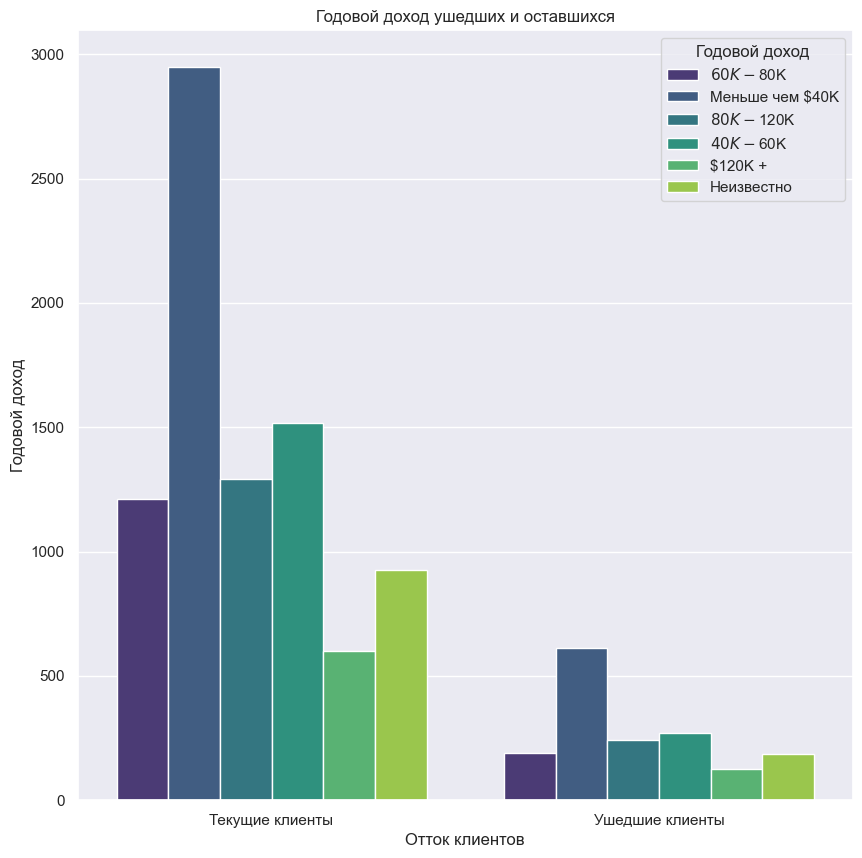

In [24]:
plt.figure(figsize=(10, 10))
sns.countplot(x='churn', hue='Income_Category', data=Inc, palette='viridis')
plt.ylabel('Годовой доход')
plt.xlabel('Отток клиентов')
plt.title('Годовой доход ушедших и оставшихся')
plt.legend(title='Годовой доход')

plt.show()

Соотношение каждого столбца ушедших к каждому столбцу текущих примерно равно.

# Карты

In [3]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [4]:
Car = df[['churn', 'Card_Category']].copy()
CAR_mapping_1 = {'Attrited Customer': 'Ушедшие клиенты', 'Existing Customer': 'Текущие клиенты'}
CAR_mapping_2 = {'Blue':'Синяя', 'Silver':'Серебряная', 'Gold':'Золотая', 'Platinum':'Платиновая'}
Car.churn = Car.churn.map(CAR_mapping_1)
Car.Card_Category = Car.Card_Category.map(CAR_mapping_2)
Car

,churn,Card_Category
0,Текущие клиенты,Синяя
1,Текущие клиенты,Синяя
2,Текущие клиенты,Синяя
3,Текущие клиенты,Синяя
4,Текущие клиенты,Синяя
...,...,...
10122,Текущие клиенты,Синяя
10123,Ушедшие клиенты,Синяя
10124,Ушедшие клиенты,Синяя
10125,Ушедшие клиенты,Синяя


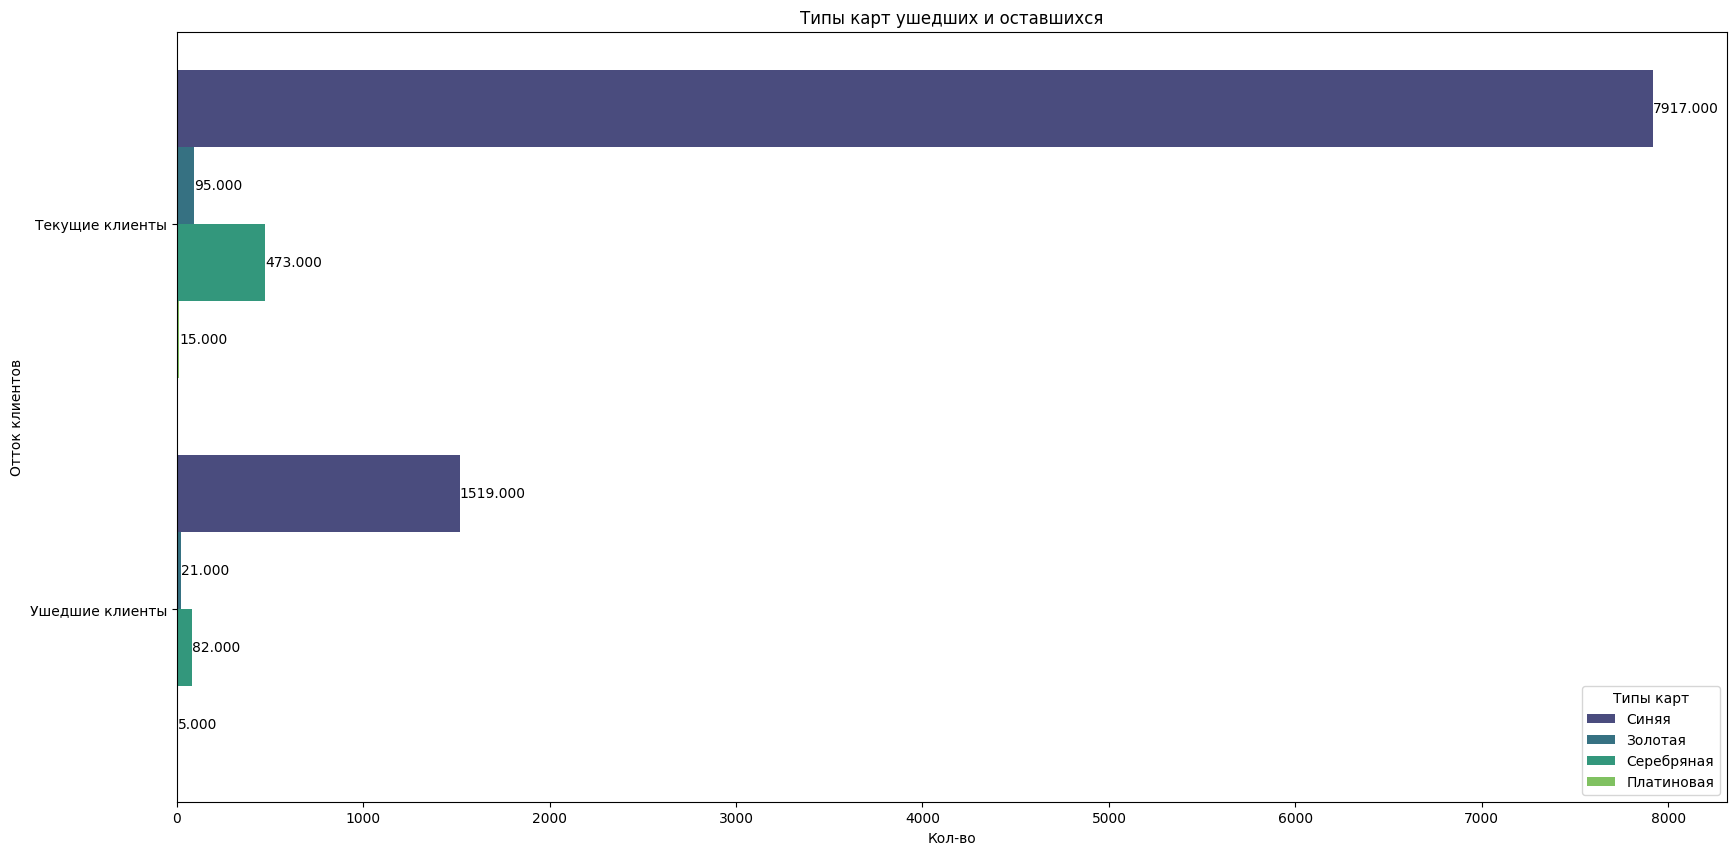

In [5]:
plt.figure(figsize=(20, 10))
at = sns.countplot(y='churn', hue='Card_Category', data=Car, palette='viridis')

plt.ylabel('Отток клиентов')
plt.xlabel('Кол-во')
plt.title('Типы карт ушедших и оставшихся')
plt.legend(title='Типы карт')
for p in at.patches:
    if p.xy[1]==0:
        break
    at.annotate(f'{float(p.get_width()):.3f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')
plt.show()

Соотношение каждого столбца ушедших к каждому столбцу текущих примерно равно.

# 📌Создание класса на основе встроеного, для кодировки без сортировки.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
class ChEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

Данный действия были проведены для упрощения моей работы. One-Hot мне использовать не захотелось, поэтому я избавился от "Сортировки по-умолчанию" в LabelEncoder. Теперь передавая значения в fit, classes_ возвращает их без сортировки.

Пример

In [29]:
tags = ['Maksim', 'Nikita', 'Veronika', 'Nadya']
test_le = LabelEncoder()
test_che = ChEncoder()
test_le.fit(tags)
test_che.fit(tags)
print(f'{test_le.classes_} != {tags}\n{test_che.classes_} == {tags}')

['Maksim' 'Nadya' 'Nikita' 'Veronika'] != ['Maksim', 'Nikita', 'Veronika', 'Nadya']
['Maksim' 'Nikita' 'Veronika' 'Nadya'] == ['Maksim', 'Nikita', 'Veronika', 'Nadya']



# 📌Кодируем в правильном порядке, возрастающим для каждого значения


In [5]:
Card = ['Blue', 'Silver', 'Gold', 'Platinum']
Income = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K',  '$120K +', ]
Marital = ['Unknown', 'Divorced', 'Single', 'Married']
Education = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
Churn = ['Existing Customer', 'Attrited Customer']

In [6]:
ce = ChEncoder()
ce.fit(Card)
df.Card_Category = ce.transform(df.Card_Category)

In [7]:
ie = ChEncoder()
ie.fit(Income)
df.Income_Category = ie.transform(df.Income_Category)

In [8]:
me = ChEncoder()
me.fit(Marital)
df.Marital_Status = me.transform(df.Marital_Status)

In [9]:
ee = ChEncoder()
ee.fit(Education)
df.Education_Level = ee.transform(df.Education_Level)

In [10]:
che = ChEncoder()
che.fit(Churn)
df.churn = che.transform(df.churn)

In [11]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [12]:
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2,3,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,4,2,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,4,3,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,1,3,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,4,2,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,1,2,0,1,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,0,1,2,3,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,1,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# 📌Просмотр правильного порядка

In [80]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [39]:
df['Card_Category'].unique()

array([0, 2, 1, 3])

In [81]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [41]:
df['Income_Category'].unique()

array([3, 1, 4, 2, 5, 0])

In [82]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [43]:
df['Marital_Status'].unique()

array([3, 2, 0, 1])

In [83]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [45]:
df['Education_Level'].unique()

array([2, 4, 1, 0, 3, 5, 6])

In [84]:
df['churn'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [47]:
df['churn'].unique()

array([0, 1])

# 📌Таблица корреляции

<Axes: >

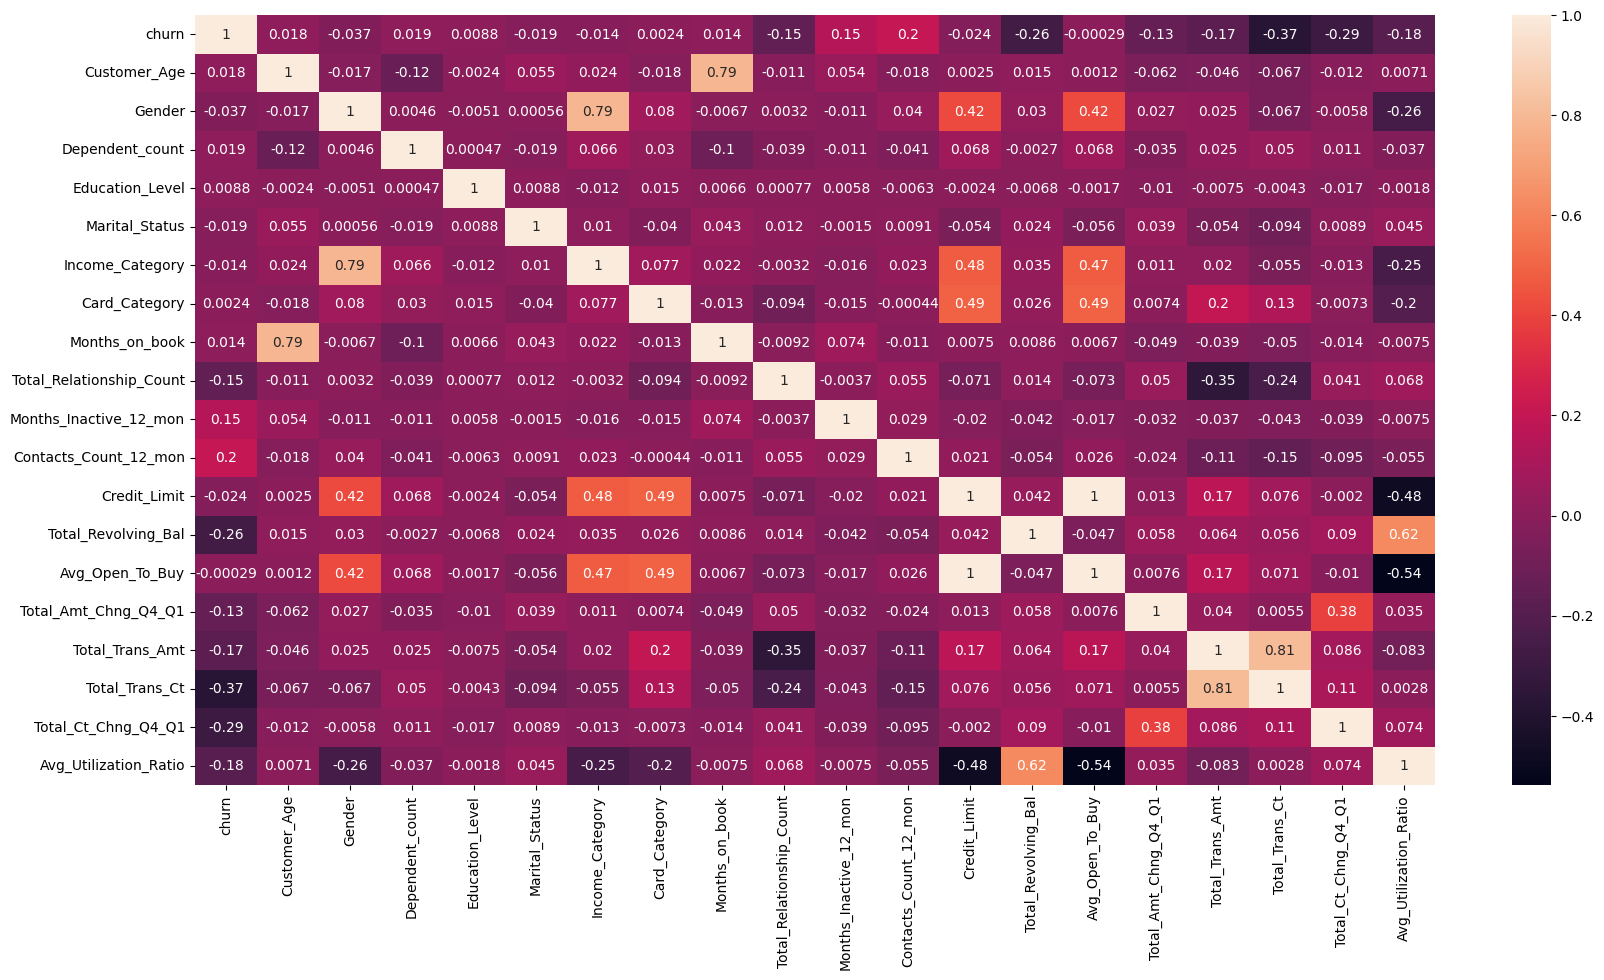

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

Churn наиболее зависит от таких значений, как:


1.  Общее кол-во продуктов, находящихся у клиента
2.  Месяцы бездействия
3.  Кол-во контактов
4.  Общий оборотный остаток на кредитной карте
5.  Изменение суммы сделки
6.  Общая сумма сделки
7.  Общее кол-во транзакций
8.  Изменение кол-ва транзакций
9.  Средний коэффициент использования карт



При увеличении значения клиенты наиболее вероятно уйдут:


1.   Месяцы бездействия
2.   Кол-во контактов



При уменьшении значения клиенты наиболее вероятно уйдут:
1.  Общее кол-во продуктов, находящихся у клиента
2.  Общий оборотный остаток на кредитной карте
3.  Изменение суммы сделки
4.  Общая сумма сделки
5.  Общее кол-во транзакций
6.  Изменение кол-ва транзакций
7.  Средний коэффициент использования карт



# 📌Подготовка к построению моделей и использованию классификаторов

Задаю объект - X и целевое значение - y, которое буду высчитывать через объект

In [13]:
X = df.drop(columns='churn')
y = df.churn

In [50]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,2,3,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,4,2,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,4,3,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,1,3,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,4,2,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,1,2,0,1,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,0,1,2,3,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,1,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: churn, Length: 10127, dtype: int64

# 😎Использование классификаторов и построение моделей

Создаю пары объектов и целевых значений для обучения и для тестирования в соотношении 8:2

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Привожу признаки/элементы объекта к одному масштабу

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 📌Классификатор DecisionTreeClassifier

Произвожу предобработку данных, используя классификатор

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5)

Строю модель классификации по тестовым данным

<Axes: >

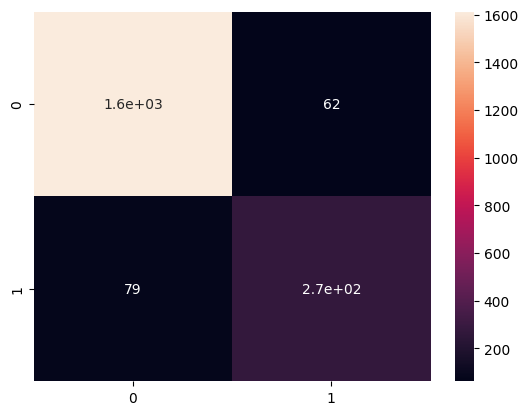

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

Строю метрику модели

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1675
           1       0.81      0.77      0.79       351

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.88      2026
weighted avg       0.93      0.93      0.93      2026



# 📌Классификатор RandomForestClassifier

Произвожу предобработку данных, используя классификатор и строю модель классификации

<Axes: >

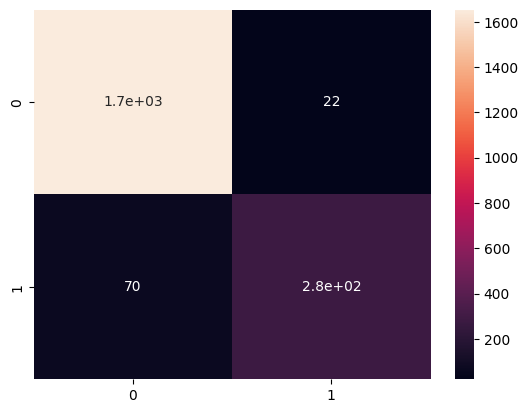

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_true = y_test
y_pred = rfc.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

Строю метрику модели

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1675
           1       0.93      0.80      0.86       351

    accuracy                           0.95      2026
   macro avg       0.94      0.89      0.92      2026
weighted avg       0.95      0.95      0.95      2026



# 📌Классификатор AdaBoostClassifier

Произвожу предобработку данных, используя классификатор и строю модель классификации

<Axes: >

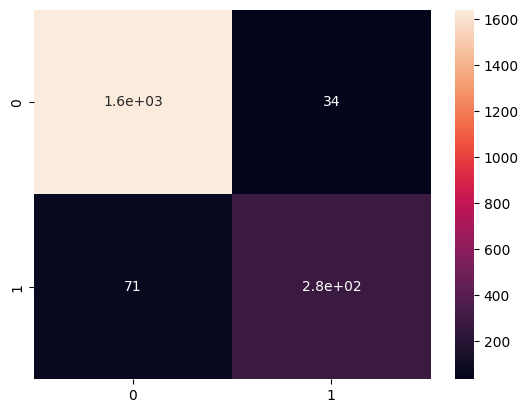

In [22]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

Строю метрику модели

In [23]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1675
           1       0.89      0.80      0.84       351

    accuracy                           0.95      2026
   macro avg       0.93      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026



# 📌Классификатор BaggingClassifier

Произвожу предобработку данных, используя классификатор и строю модель классификации

<Axes: >

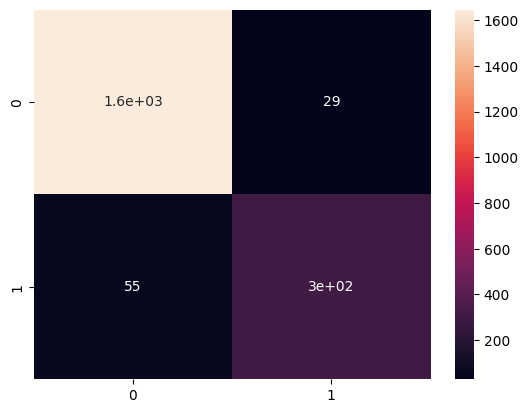

In [24]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=110, random_state=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

Строю метрику модели

In [25]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1675
           1       0.91      0.84      0.88       351

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



# 📌Классификатор ExtraTreesClassifier

Произвожу предобработку данных, используя классификатор и строю модель классификации

<Axes: >

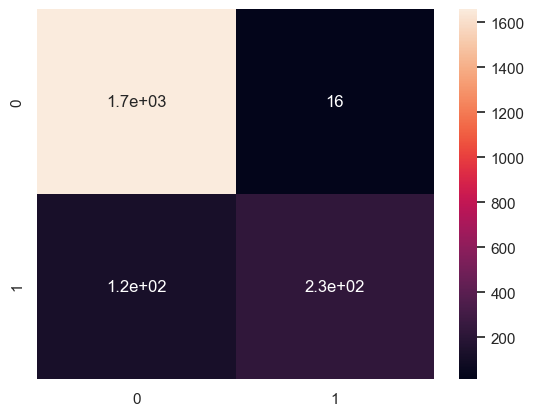

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

Строю метрику модели

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1675
           1       0.93      0.64      0.76       351

    accuracy                           0.93      2026
   macro avg       0.93      0.82      0.86      2026
weighted avg       0.93      0.93      0.93      2026



# 📌Классификатор GradientBoostingClassifier

Произвожу предобработку данных, используя классификатор и строю модель классификации

<Axes: >

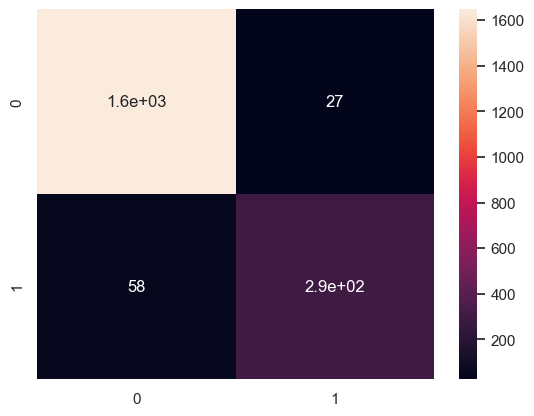

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

Строю метрику модели

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1675
           1       0.92      0.83      0.87       351

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



# 📌Классификатор HistGradientBoostingClassifier

Произвожу предобработку данных, используя классификатор и строю модель классификации

<Axes: >

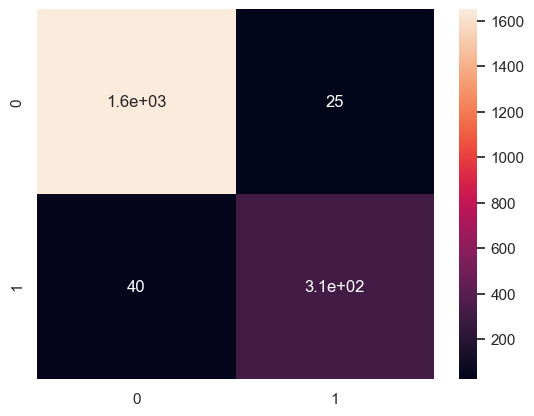

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(random_state=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

Строю метрику модели

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1675
           1       0.93      0.89      0.91       351

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



# 😆Вывод

Классификатор HistGradientBoostingClassifier для этих данных является лучшим решением.

Ведь, сравнивая метрику всех классификаторов, видно, что у него самый большой показатель Recall, что является приоритетным в нашей задаче. И почти самый большой Precision, что тоже очень важно.

А также самый большой f1-score.

В данной задаче он показал себя лучше всех.